In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import string
import spacy
from tqdm import tqdm
import tensorflow as tf
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

2024-10-18 11:01:01.642645: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-18 11:01:01.657047: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-18 11:01:01.661414: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-18 11:01:01.672838: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-18 11:01:02.431590: W tensorflow/comp

In [2]:
import pandas as pd

train_data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")
valid_data = pd.read_csv("valid_data.csv")

In [3]:
train_data

,text,label,clean_text,lemmatized_text,stemmed_text,pos,combined_text
0,"AC Milan coach, Pippo Inzaghi, took some of hi...",1,ac milan coach pippo inzaghi took some of his ...,ac milan coach pippo inzaghi take some of his ...,ac milan coach pippo inzaghi took some of his ...,PROPN PROPN PROPN PROPN PROPN VERB PRON ADP PR...,ac milan coach pippo inzaghi took some of his ...
1,Pam Jackson and Cheryl Miller were last seen o...,0,pam jackson and cheryl miller were last seen o...,pam jackson and cheryl miller be last see on m...,pam jackson and cheryl miller were last seen o...,PROPN PROPN CCONJ PROPN PROPN AUX ADV VERB ADP...,pam jackson and cheryl miller were last seen o...
2,A female Tawny Frogmouth born at the St. Louis...,1,a female tawny frogmouth born at the st louis ...,a female tawny frogmouth bear at the st louis ...,a femal tawni frogmouth born at the st loui zo...,DET ADJ NOUN NOUN VERB ADP DET PROPN PROPN NOU...,a female tawny frogmouth born at the st louis ...
3,Victoria Azarenka has been struggling with a f...,0,victoria azarenka has been struggling with a f...,victoria azarenka have be struggle with a foot...,victoria azarenka has been struggl with a foot...,PROPN PROPN AUX AUX VERB ADP DET NOUN NOUN NOU...,victoria azarenka has been struggling with a f...
4,A photograph has emerged of a baby crawling pe...,1,a photograph has emerged of a baby crawling pe...,a photograph have emerge of a baby crawl peril...,a photograph has emerg of a babi crawl peril c...,DET NOUN AUX VERB ADP DET NOUN VERB ADV ADJ AD...,a photograph has emerged of a baby crawling pe...
...,...,...,...,...,...,...,...
148397,"Hi, Welcome to Health care magic forum. ...",0,hi welcome to health care magic forum it is co...,hi welcome to health care magic forum it be co...,hi welcom to health care magic forum it is con...,INTJ VERB ADP NOUN NOUN NOUN NOUN PRON AUX VER...,hi welcome to health care magic forum it is co...
148398,"The water is constantly recycled , so it does ...",0,the water is constantly recycled so it does nt...,the water be constantly recycle so it do not m...,the water is constant recycl so it doe nt matt...,DET NOUN AUX ADV VERB SCONJ PRON AUX PART VERB...,the water is constantly recycled so it does nt...
148399,"Nothing . Spain wo n't recognise it , the EU w...",0,nothing spain wo nt recognise it the eu wo nt ...,nothing spain will not recognise it the eu wil...,noth spain wo nt recognis it the eu wo nt reco...,PRON PROPN AUX PART VERB PRON DET PROPN AUX PA...,nothing spain wo nt recognise it the eu wo nt ...
148400,Writing a short poem In seventeen syllables Is...,0,writing a short poem in seventeen syllables is...,write a short poem in seventeen syllable be ve...,write a short poem in seventeen syllabl is ver...,VERB DET ADJ NOUN ADP NUM NOUN AUX ADV ADJ,writing a short poem in seventeen syllables is...


In [4]:
valid_data

,text,label,clean_text,lemmatized_text,stemmed_text,pos,combined_text
0,"Engineering multinational, Arup, has released ...",1,engineering multinational arup has released a ...,engineering multinational arup have release a ...,engin multin arup has releas a report entitl i...,NOUN ADJ NOUN AUX VERB DET NOUN VERB PRON ADJ ...,engineering multinational arup has released a ...
1,A hostage situation and fatal police standoff ...,1,a hostage situation and fatal police standoff ...,a hostage situation and fatal police standoff ...,a hostag situat and fatal polic standoff erupt...,DET NOUN NOUN CCONJ ADJ NOUN NOUN VERB ADP DET...,a hostage situation and fatal police standoff ...
2,"Authorities took Eugene, Oregon man Jeffrey Wr...",0,authorities took eugene oregon man jeffrey wri...,authority take eugene oregon man jeffrey wrigh...,author took eugen oregon man jeffrey wright le...,NOUN VERB NOUN PROPN PROPN PROPN PROPN VERB AD...,authorities took eugene oregon man jeffrey wri...
3,"Inter Milan, despite resting several key playe...",1,inter milan despite resting several key player...,inter milan despite rest several key player su...,inter milan despit rest sever key player such ...,PROPN PROPN SCONJ VERB ADJ ADJ NOUN ADJ ADP NO...,inter milan despite resting several key player...
4,Scientists hope deadly creatures can save huma...,0,scientists hope deadly creatures can save huma...,scientist hope deadly creature can save human ...,scientist hope dead creatur can save human gil...,NOUN VERB ADJ NOUN AUX VERB NOUN VERB NOUN NOU...,scientists hope deadly creatures can save huma...
...,...,...,...,...,...,...,...
16487,I will now sum up the Illuminati for you . Rea...,0,i will now sum up the illuminati for you ready...,I will now sum up the illuminati for you ready...,i will now sum up the illuminati for you readi...,PRON AUX ADV VERB ADP DET NOUN ADP PRON ADJ NO...,i will now sum up the illuminati for you ready...
16488,Game programmers will need to have a perfectly...,0,game programmers will need to have a perfectly...,game programmer will need to have a perfectly ...,game programm will need to have a perfect comp...,NOUN NOUN AUX VERB PART VERB DET ADV VERB NOUN...,game programmers will need to have a perfectly...
16489,You can see stars thousands of light years awa...,0,you can see stars thousands of light years awa...,you can see star thousand of light year away j...,you can see star thousand of light year away j...,PRON AUX VERB NOUN NOUN ADP ADJ NOUN ADV ADV V...,you can see stars thousands of light years awa...
16490,Just yesterday saw an article saying that worm...,0,just yesterday saw an article saying that worm...,just yesterday see an article say that worm ha...,just yesterday saw an articl say that worm hav...,ADV NOUN VERB DET NOUN VERB SCONJ NOUN AUX VER...,just yesterday saw an article saying that worm...


In [5]:
test_data

,text,label,clean_text,lemmatized_text,stemmed_text,pos,combined_text
0,You could forgive Apple's legal team for comin...,0,you could forgive apples legal team for coming...,you could forgive apple legal team for come ac...,you could forgiv appl legal team for come acro...,PRON AUX VERB NOUN ADJ NOUN ADP VERB ADP DET A...,you could forgive apples legal team for coming...
1,Liberal and conservative are two different way...,1,liberal and conservative are two different way...,liberal and conservative be two different way ...,liber and conserv are two differ way of think ...,ADJ CCONJ ADJ AUX NUM ADJ NOUN ADP VERB ADP NO...,liberal and conservative are two different way...
2,The sun is also white . It just appears yellow...,0,the sun is also white it just appears yellow next,the sun be also white it just appear yellow next,the sun is also white it just appear yellow next,DET NOUN AUX ADV ADJ PRON ADV VERB ADJ ADP,the sun is also white it just appears yellow n...
3,North Lanarkshire Council in Scotland has laun...,1,north lanarkshire council in scotland has laun...,north lanarkshire council in scotland have lau...,north lanarkshir council in scotland has launc...,PROPN PROPN PROPN ADP PROPN AUX VERB DET NOUN ...,north lanarkshire council in scotland has laun...
4,"""I was looking for something that was comparab...",0,i was looking for something that was comparabl...,I be look for something that be comparable for...,i was look for someth that was compar for my p...,PRON AUX VERB ADP PRON PRON AUX ADJ ADP PRON NOUN,i was looking for something that was comparabl...
...,...,...,...,...,...,...,...
14835,These Vienna talks for the first time include ...,0,these vienna talks for the first time include ...,these vienna talk for the first time include a...,these vienna talk for the first time includ al...,DET NOUN VERB ADP DET ADJ NOUN VERB DET DET AD...,these vienna talks for the first time include ...
14836,India's film censorship board has granted a ce...,1,indias film censorship board has granted a cer...,indias film censorship board have grant a cert...,india film censorship board has grant a certif...,PROPN PROPN NOUN NOUN AUX VERB DET NOUN ADP DE...,indias film censorship board has granted a cer...
14837,"Expanding ammunition, also known as hollow poi...",1,expanding ammunition also known as hollow poin...,expand ammunition also know as hollow point bu...,expand ammunit also known as hollow point bull...,VERB NOUN ADV VERB ADP ADJ NOUN NOUN AUX VERB ...,expanding ammunition also known as hollow poin...
14838,They will have in-depth discussions on relatio...,0,they will have indepth discussions on relation...,they will have indepth discussion on relation ...,they will have indepth discuss on relat betwee...,PRON AUX VERB ADJ NOUN ADP NOUN ADP DET NUM NO...,they will have indepth discussions on relation...


In [6]:
train_x, test_x, train_y, test_y = train_data['combined_text'], test_data['combined_text'], train_data['label'], test_data['label']
train_x, valid_x, train_y, valid_y = train_data['combined_text'], valid_data['combined_text'], train_data['label'], valid_data['label']

In [7]:
# TF-IDF Vectorization using all combined text features
tfidf = TfidfVectorizer(max_features=5000)
train_x_tfidf = tfidf.fit_transform(train_x).toarray()
valid_x_tfidf = tfidf.transform(valid_x).toarray()
test_x_tfidf = tfidf.transform(test_x).toarray()

# Convert labels to numpy arrays
train_y = np.array(train_y)
valid_y = np.array(valid_y)
test_y = np.array(test_y)

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_x_tfidf, train_y)).batch(64).prefetch(tf.data.AUTOTUNE)
valid_dataset = tf.data.Dataset.from_tensor_slices((valid_x_tfidf, valid_y)).batch(64).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((test_x_tfidf, test_y)).batch(64).prefetch(tf.data.AUTOTUNE)

2024-10-18 11:01:51.356073: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-10-18 11:01:51.402802: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 5936080000 exceeds 10% of free system memory.
2024-10-18 11:02:00.672000: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 659680000 exceeds 10% of free system memory.
2024-10-18 11:02:01.687057: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 593600000 exceeds 10% of free system memory.


/home/yadagiri/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


2024-10-18 11:02:04.420198: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2968040000 exceeds 10% of free system memory.


4638/4638 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.7616 - loss: 0.4476

2024-10-18 11:17:31.586320: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 329840000 exceeds 10% of free system memory.


4638/4638 ━━━━━━━━━━━━━━━━━━━━ 950s 204ms/step - accuracy: 0.7616 - loss: 0.4476 - val_accuracy: 0.8354 - val_loss: 0.3249
Epoch 2/5
4638/4638 ━━━━━━━━━━━━━━━━━━━━ 955s 206ms/step - accuracy: 0.8496 - loss: 0.3021 - val_accuracy: 0.8433 - val_loss: 0.3033
Epoch 3/5
4638/4638 ━━━━━━━━━━━━━━━━━━━━ 998s 215ms/step - accuracy: 0.8667 - loss: 0.2700 - val_accuracy: 0.8450 - val_loss: 0.3039
Epoch 4/5
4638/4638 ━━━━━━━━━━━━━━━━━━━━ 959s 207ms/step - accuracy: 0.8825 - loss: 0.2421 - val_accuracy: 0.8447 - val_loss: 0.3058
Epoch 5/5
4638/4638 ━━━━━━━━━━━━━━━━━━━━ 955s 206ms/step - accuracy: 0.8940 - loss: 0.2223 - val_accuracy: 0.8414 - val_loss: 0.3119
4638/4638 ━━━━━━━━━━━━━━━━━━━━ 234s 50ms/step
Train Accuracy:  0.9275009770757806
Train F1 Score:  0.9160613838676206
464/464 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step
Test Accuracy:  0.8337601078167116
Test F1 Score:  0.7928457469140986
Test Classification Report:
               precision    recall  f1-score   support

           0       0.83      0

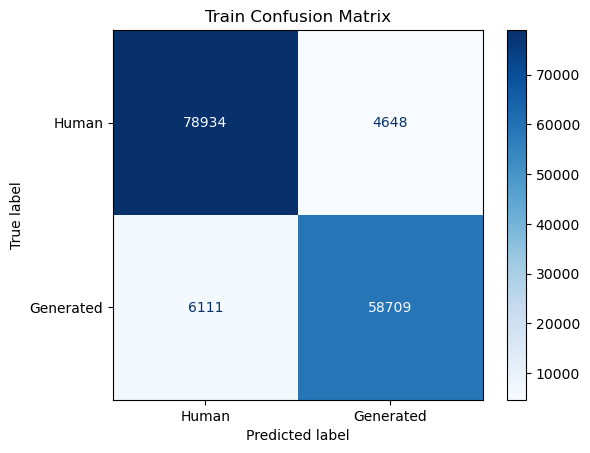

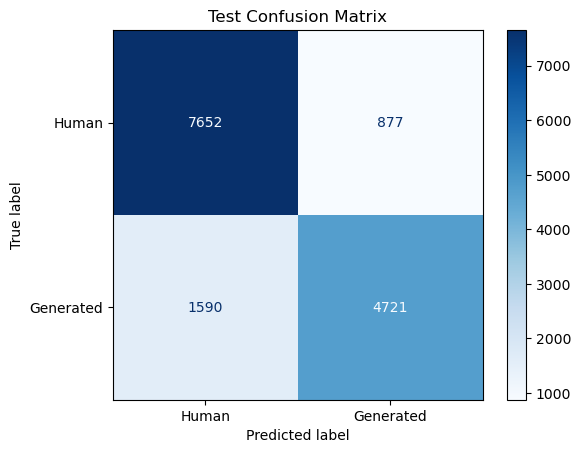

In [8]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Define the CNN model
model_CNN = Sequential()
model_CNN.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(train_x_tfidf.shape[1], 1)))
model_CNN.add(MaxPooling1D(pool_size=2))
model_CNN.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_CNN.add(MaxPooling1D(pool_size=2))
model_CNN.add(Flatten())
model_CNN.add(Dense(128, activation='relu'))
model_CNN.add(Dropout(0.5))
model_CNN.add(Dense(1, activation='sigmoid'))  
model_CNN.compile(loss='binary_crossentropy',  
              optimizer='adam',
              metrics=['accuracy'])

# Reshape data
train_x_tfidf_reshaped = train_x_tfidf.reshape((train_x_tfidf.shape[0], train_x_tfidf.shape[1], 1))
valid_x_tfidf_reshaped = valid_x_tfidf.reshape((valid_x_tfidf.shape[0], valid_x_tfidf.shape[1], 1))
test_x_tfidf_reshaped = test_x_tfidf.reshape((test_x_tfidf.shape[0], test_x_tfidf.shape[1], 1))

# Train the model
model_CNN.fit(train_x_tfidf_reshaped, train_y, validation_data=(valid_x_tfidf_reshaped, valid_y), epochs=5)

# Train predictions
train_pred_y = (model_CNN.predict(train_x_tfidf_reshaped) > 0.5).astype("int32").flatten()

# Train accuracy and F1 score
train_accuracy = accuracy_score(train_y, train_pred_y)
train_f1_score = f1_score(train_y, train_pred_y)

print("Train Accuracy: ", train_accuracy)
print("Train F1 Score: ", train_f1_score)

# Test predictions
test_pred_y = (model_CNN.predict(test_x_tfidf_reshaped) > 0.5).astype("int32").flatten()

# Test accuracy and F1 score
test_accuracy = accuracy_score(test_y, test_pred_y)
test_f1_score = f1_score(test_y, test_pred_y)

print("Test Accuracy: ", test_accuracy)
print("Test F1 Score: ", test_f1_score)

# Confusion matrix for Train data
train_conf_matrix = confusion_matrix(train_y, train_pred_y)
train_cmd = ConfusionMatrixDisplay(train_conf_matrix, display_labels=['Human', 'Generated'])
train_cmd.plot(cmap='Blues')
train_cmd.ax_.set_title("Train Confusion Matrix")

# Confusion matrix for Test data
test_conf_matrix = confusion_matrix(test_y, test_pred_y)
test_cmd = ConfusionMatrixDisplay(test_conf_matrix, display_labels=['Human', 'Generated'])
test_cmd.plot(cmap='Blues')
test_cmd.ax_.set_title("Test Confusion Matrix")

# Classification report for Test data
test_report = classification_report(test_y, test_pred_y)
print("Test Classification Report:\n", test_report)


Epoch 1/5


/home/yadagiri/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2319/2319 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7133 - loss: 0.5093 - val_accuracy: 0.7284 - val_loss: 0.9628
Epoch 2/5
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7631 - loss: 0.4343 - val_accuracy: 0.7467 - val_loss: 0.9968
Epoch 3/5
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7895 - loss: 0.3959 - val_accuracy: 0.7664 - val_loss: 0.9289
Epoch 4/5
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8098 - loss: 0.3634 - val_accuracy: 0.7614 - val_loss: 1.0504
Epoch 5/5
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8250 - loss: 0.3416 - val_accuracy: 0.7732 - val_loss: 1.0908
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Train Accuracy:  0.7938572256438593
Train F1 Score:  0.7005774689243418
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Validation Accuracy:  0.7731627455736114
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Accuracy:  0.7778301886792452
Test F1 Score:  0.6657881398884947
Test Classification Report:
               precision

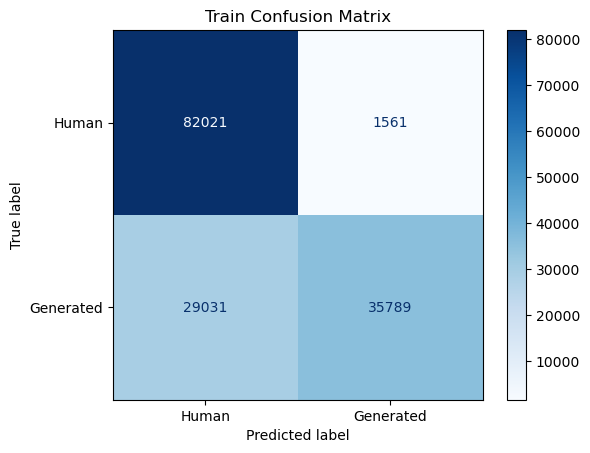

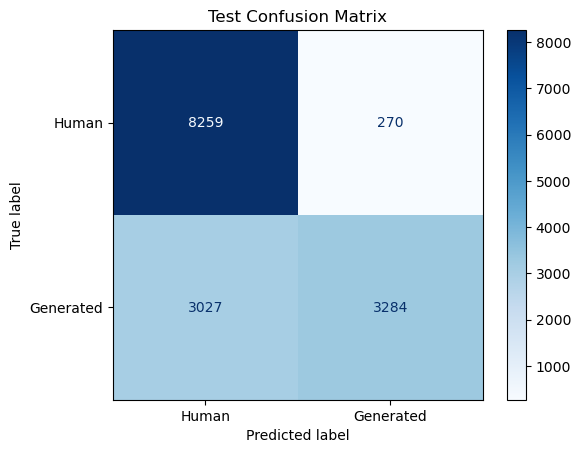

In [9]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Define the LSTM model (though it doesn't use LSTM layers)
model_LSTM = Sequential()
model_LSTM.add(Dense(128, activation='relu', input_shape=(train_x_tfidf.shape[1],))) 
model_LSTM.add(Dropout(0.5))  
model_LSTM.add(Dense(64, activation='relu'))
model_LSTM.add(Dropout(0.5))
model_LSTM.add(Dense(1, activation='sigmoid'))  
model_LSTM.compile(loss='binary_crossentropy',  
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
model_LSTM.fit(train_dataset, validation_data=valid_dataset, epochs=5)

# Train predictions
train_pred_y = (model_LSTM.predict(train_dataset) > 0.5).astype("int32").flatten()

# Train accuracy and F1 score
train_accuracy = accuracy_score(train_y, train_pred_y)
train_f1_score = f1_score(train_y, train_pred_y)

print("Train Accuracy: ", train_accuracy)
print("Train F1 Score: ", train_f1_score)

# Validation predictions
valid_pred_y = (model_LSTM.predict(valid_dataset) > 0.5).astype("int32").flatten() 
print("Validation Accuracy: ", accuracy_score(valid_y, valid_pred_y))

# Test predictions
test_pred_y = (model_LSTM.predict(test_dataset) > 0.5).astype("int32").flatten()  
print("Test Accuracy: ", accuracy_score(test_y, test_pred_y))

# Test F1 Score
test_f1_score = f1_score(test_y, test_pred_y)
print("Test F1 Score: ", test_f1_score)

# Confusion matrix for Train data
train_conf_matrix = confusion_matrix(train_y, train_pred_y)
train_cmd = ConfusionMatrixDisplay(train_conf_matrix, display_labels=['Human', 'Generated'])
train_cmd.plot(cmap='Blues')
train_cmd.ax_.set_title("Train Confusion Matrix")

# Confusion matrix for Test data
test_conf_matrix = confusion_matrix(test_y, test_pred_y)
test_cmd = ConfusionMatrixDisplay(test_conf_matrix, display_labels=['Human', 'Generated'])
test_cmd.plot(cmap='Blues')
test_cmd.ax_.set_title("Test Confusion Matrix")

# Classification report for Test data
test_report = classification_report(test_y, test_pred_y)
print("Test Classification Report:\n", test_report)


Epoch 1/20
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 33s 14ms/step - accuracy: 0.7183 - loss: 0.5305 - val_accuracy: 0.7227 - val_loss: 1.0178
Epoch 2/20
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 33s 14ms/step - accuracy: 0.7652 - loss: 0.4367 - val_accuracy: 0.7296 - val_loss: 1.1662
Epoch 3/20
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 33s 14ms/step - accuracy: 0.8056 - loss: 0.3784 - val_accuracy: 0.7443 - val_loss: 1.2904
Epoch 4/20
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 31s 13ms/step - accuracy: 0.8416 - loss: 0.3223 - val_accuracy: 0.7488 - val_loss: 1.4694
Epoch 5/20
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 31s 14ms/step - accuracy: 0.8753 - loss: 0.2689 - val_accuracy: 0.7486 - val_loss: 1.6519
Epoch 6/20
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 31s 13ms/step - accuracy: 0.9009 - loss: 0.2301 - val_accuracy: 0.7695 - val_loss: 1.5474
Epoch 7/20
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 31s 13ms/step - accuracy: 0.9294 - loss: 0.1746 - val_accuracy: 0.7671 - val_loss: 1.7208
Epoch 8/20
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 31s 13ms/step - accuracy: 0.9539 -

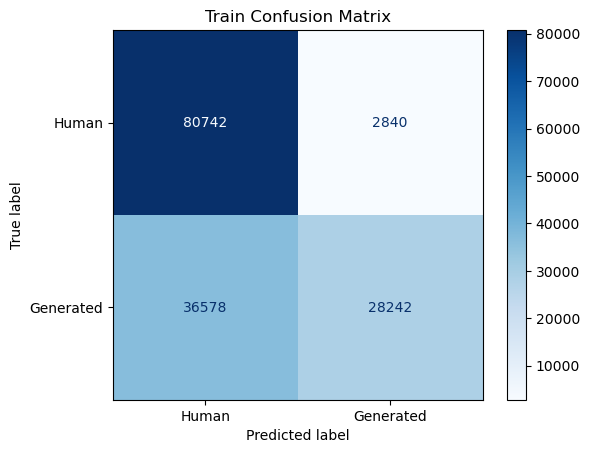

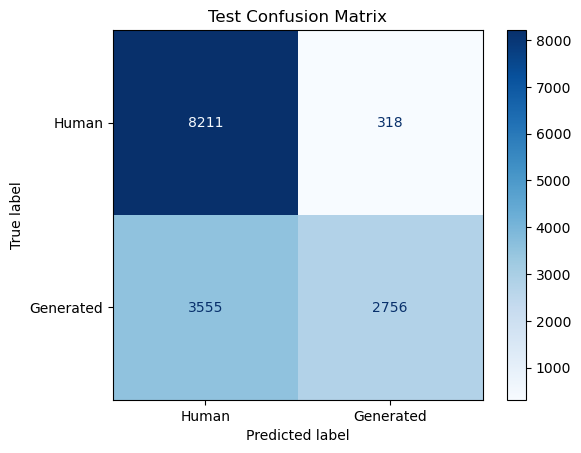

In [10]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# RNN Model definition
model_RNN = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(train_x_tfidf.shape[1],)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

# Compile the model
model_RNN.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(1e-4),
    metrics=['accuracy']
)

# Training the model
model_RNN.fit(
    train_dataset,
    epochs=20,
    validation_data=valid_dataset,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
)

# Evaluate the model on the test set
test_loss, test_acc = model_RNN.evaluate(test_dataset)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

# Make predictions on train data
train_pred_prob = model_RNN.predict(train_x_tfidf)
train_pred_y = (train_pred_prob > 0.5).astype(int).flatten()

# Calculate Train Accuracy and Train F1 Score
train_accuracy = accuracy_score(train_y, train_pred_y)
train_f1_score = f1_score(train_y, train_pred_y)

print("Train Accuracy: ", train_accuracy)
print("Train F1 Score: ", train_f1_score)

# Confusion Matrix for Train Data
train_conf_matrix = confusion_matrix(train_y, train_pred_y)
train_cmd = ConfusionMatrixDisplay(train_conf_matrix, display_labels=['Human', 'Generated'])
train_cmd.plot(cmap='Blues')
train_cmd.ax_.set_title("Train Confusion Matrix")

# Make predictions on test data
test_pred_prob = model_RNN.predict(test_x_tfidf)
test_pred_y = (test_pred_prob > 0.5).astype(int).flatten()

# Calculate Test Accuracy and Test F1 Score
test_accuracy = accuracy_score(test_y, test_pred_y)
test_f1_score = f1_score(test_y, test_pred_y)

print("Test Accuracy: ", test_accuracy)
print("Test F1 Score: ", test_f1_score)

# Confusion Matrix for Test Data
test_conf_matrix = confusion_matrix(test_y, test_pred_y)
test_cmd = ConfusionMatrixDisplay(test_conf_matrix, display_labels=['Human', 'Generated'])
test_cmd.plot(cmap='Blues')
test_cmd.ax_.set_title("Test Confusion Matrix")

# Classification report for Test Data
test_report = classification_report(test_y, test_pred_y)
print("Test Classification Report:\n", test_report)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Initialize SVM model
svm_model = SVC(kernel='linear', probability=True)

# Train the model
svm_model.fit(train_x_tfidf, train_y)

# Train predictions
train_pred_y = svm_model.predict(train_x_tfidf)

# Train accuracy and F1 score
train_accuracy = accuracy_score(train_y, train_pred_y)
train_f1_score = f1_score(train_y, train_pred_y)

print("Train Accuracy: ", train_accuracy)
print("Train F1 Score: ", train_f1_score)

# Validation predictions (Optional)
valid_pred_y = svm_model.predict(valid_x_tfidf)
print("Validation Accuracy: ", accuracy_score(valid_y, valid_pred_y))

# Test predictions
test_pred_y = svm_model.predict(test_x_tfidf)

# Test accuracy and F1 score
test_accuracy = accuracy_score(test_y, test_pred_y)
test_f1_score = f1_score(test_y, test_pred_y)

print("Test Accuracy: ", test_accuracy)
print("Test F1 Score: ", test_f1_score)

# Confusion matrix for Train data
train_conf_matrix = confusion_matrix(train_y, train_pred_y)
train_cmd = ConfusionMatrixDisplay(train_conf_matrix, display_labels=['human', 'generated'])
train_cmd.plot(cmap='Blues')
train_cmd.ax_.set_title("Train Confusion Matrix")

# Confusion matrix for Test data
test_conf_matrix = confusion_matrix(test_y, test_pred_y)
test_cmd = ConfusionMatrixDisplay(test_conf_matrix, display_labels=['human', 'generated'])
test_cmd.plot(cmap='Blues')
test_cmd.ax_.set_title("Test Confusion Matrix")

# Classification report for Test data
test_report = classification_report(test_y, test_pred_y)
print("Test Classification Report:\n", test_report)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Create and fit the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(train_x_tfidf, train_y)

# Train predictions
train_pred_y = knn_model.predict(train_x_tfidf)

# Train accuracy and F1 score
train_accuracy = accuracy_score(train_y, train_pred_y)
train_f1_score = f1_score(train_y, train_pred_y)

print("Train Accuracy: ", train_accuracy)
print("Train F1 Score: ", train_f1_score)

# Validation predictions
valid_pred_y = knn_model.predict(valid_x_tfidf)
print("Validation Accuracy: ", accuracy_score(valid_y, valid_pred_y))

# Test predictions
test_pred_y = knn_model.predict(test_x_tfidf)

# Test accuracy and F1 score
test_accuracy = accuracy_score(test_y, test_pred_y)
test_f1_score = f1_score(test_y, test_pred_y)

print("Test Accuracy: ", test_accuracy)
print("Test F1 Score: ", test_f1_score)

# Confusion matrix for Train data
train_conf_matrix = confusion_matrix(train_y, train_pred_y)
train_cmd = ConfusionMatrixDisplay(train_conf_matrix, display_labels=['human', 'generated'])
train_cmd.plot(cmap='Blues')
train_cmd.ax_.set_title("Train Confusion Matrix")

# Confusion matrix for Test data
test_conf_matrix = confusion_matrix(test_y, test_pred_y)
test_cmd = ConfusionMatrixDisplay(test_conf_matrix, display_labels=['human', 'generated'])
test_cmd.plot(cmap='Blues')
test_cmd.ax_.set_title("Test Confusion Matrix")

# Classification report for Test data
test_report = classification_report(test_y, test_pred_y)
print("Test Classification Report:\n", test_report)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Initialize the Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on training data
dt_model.fit(train_x_tfidf, train_y)

# Train predictions
train_pred_y = dt_model.predict(train_x_tfidf)

# Train accuracy and F1 score
train_accuracy = accuracy_score(train_y, train_pred_y)
train_f1_score = f1_score(train_y, train_pred_y)

print("Train Accuracy: ", train_accuracy)
print("Train F1 Score: ", train_f1_score)

# Validation predictions
valid_pred_y = dt_model.predict(valid_x_tfidf)
print("Validation Accuracy: ", accuracy_score(valid_y, valid_pred_y))

# Test predictions
test_pred_y = dt_model.predict(test_x_tfidf)

# Test accuracy and F1 score
test_accuracy = accuracy_score(test_y, test_pred_y)
test_f1_score = f1_score(test_y, test_pred_y)

print("Test Accuracy: ", test_accuracy)
print("Test F1 Score: ", test_f1_score)

# Confusion matrix for Train data
train_conf_matrix = confusion_matrix(train_y, train_pred_y)
train_cmd = ConfusionMatrixDisplay(train_conf_matrix, display_labels=['human', 'generated'])
train_cmd.plot(cmap='Blues')
train_cmd.ax_.set_title("Train Confusion Matrix")

# Confusion matrix for Test data
test_conf_matrix = confusion_matrix(test_y, test_pred_y)
test_cmd = ConfusionMatrixDisplay(test_conf_matrix, display_labels=['human', 'generated'])
test_cmd.plot(cmap='Blues')
test_cmd.ax_.set_title("Test Confusion Matrix")

# Classification report for Test data
test_report = classification_report(test_y, test_pred_y)
print("Test Classification Report:\n", test_report)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Initialize AdaBoost model with a weak classifier (Decision Tree Stump)
dt_stump = DecisionTreeClassifier(max_depth=1, random_state=42)
ada_model = AdaBoostClassifier(estimator=dt_stump, n_estimators=100, algorithm='SAMME', random_state=42)

# Train the model
ada_model.fit(train_x_tfidf, train_y)

# Train predictions
train_pred_y = ada_model.predict(train_x_tfidf)

# Train accuracy and F1 score
train_accuracy = accuracy_score(train_y, train_pred_y)
train_f1_score = f1_score(train_y, train_pred_y)

print("Train Accuracy: ", train_accuracy)
print("Train F1 Score: ", train_f1_score)

# Validation predictions (already in your code)
valid_pred_y = ada_model.predict(valid_x_tfidf)
print("Validation Accuracy: ", accuracy_score(valid_y, valid_pred_y))

# Test predictions
test_pred_y = ada_model.predict(test_x_tfidf)

# Test accuracy and F1 score
test_accuracy = accuracy_score(test_y, test_pred_y)
test_f1_score = f1_score(test_y, test_pred_y)

print("Test Accuracy: ", test_accuracy)
print("Test F1 Score: ", test_f1_score)

# Confusion matrix for Train data
train_conf_matrix = confusion_matrix(train_y, train_pred_y)
train_cmd = ConfusionMatrixDisplay(train_conf_matrix, display_labels=['Human', 'Generated'])
train_cmd.plot(cmap='Blues')
train_cmd.ax_.set_title("Train Confusion Matrix")

# Confusion matrix for Test data
test_conf_matrix = confusion_matrix(test_y, test_pred_y)
test_cmd = ConfusionMatrixDisplay(test_conf_matrix, display_labels=['Human', 'Generated'])
test_cmd.plot(cmap='Blues')
test_cmd.ax_.set_title("Test Confusion Matrix")

# Classification report for Test data
test_report = classification_report(test_y, test_pred_y)
print("Test Classification Report:\n", test_report)


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Create a base estimator (Decision Tree)
base_estimator = DecisionTreeClassifier()

# Bagging Classifier with 100 estimators
bagging_model = BaggingClassifier(estimator=base_estimator, n_estimators=100, random_state=42)

# Fit the model
bagging_model.fit(train_x_tfidf, train_y)

# **Train Predictions and Evaluation**:
train_pred_y = bagging_model.predict(train_x_tfidf)

# Train Accuracy and F1 Score
train_accuracy = accuracy_score(train_y, train_pred_y)
train_f1_score = f1_score(train_y, train_pred_y)

print("Train Accuracy: ", train_accuracy)
print("Train F1 Score: ", train_f1_score)

# **Test Predictions and Evaluation**:
test_pred_y = bagging_model.predict(test_x_tfidf)

# Test Accuracy and F1 Score
test_accuracy = accuracy_score(test_y, test_pred_y)
test_f1_score = f1_score(test_y, test_pred_y)

print("Test Accuracy: ", test_accuracy)
print("Test F1 Score: ", test_f1_score)

# **Confusion Matrix for Train Data**:
train_conf_matrix = confusion_matrix(train_y, train_pred_y)
train_cmd = ConfusionMatrixDisplay(train_conf_matrix, display_labels=['Human', 'Generated'])
train_cmd.plot(cmap='Blues')
train_cmd.ax_.set_title("Train Confusion Matrix")

# **Confusion Matrix for Test Data**:
test_conf_matrix = confusion_matrix(test_y, test_pred_y)
test_cmd = ConfusionMatrixDisplay(test_conf_matrix, display_labels=['Human', 'Generated'])
test_cmd.plot(cmap='Blues')
test_cmd.ax_.set_title("Test Confusion Matrix")

# **Classification Report for Test Data**:
test_report = classification_report(test_y, test_pred_y)
print("Test Classification Report:\n", test_report)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Initialize and fit the Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gradient_boosting_model.fit(train_x_tfidf, train_y)

# Train predictions
train_pred_y = gradient_boosting_model.predict(train_x_tfidf)

# Train Accuracy and F1 Score
train_accuracy = accuracy_score(train_y, train_pred_y)
train_f1_score = f1_score(train_y, train_pred_y)

print("Train Accuracy: ", train_accuracy)
print("Train F1 Score: ", train_f1_score)

# Validation predictions
valid_pred_y = gradient_boosting_model.predict(valid_x_tfidf)
print("Validation Accuracy: ", accuracy_score(valid_y, valid_pred_y))

# Test predictions
test_pred_y = gradient_boosting_model.predict(test_x_tfidf)

# Test Accuracy and F1 Score
test_accuracy = accuracy_score(test_y, test_pred_y)
test_f1_score = f1_score(test_y, test_pred_y)

print("Test Accuracy: ", test_accuracy)
print("Test F1 Score: ", test_f1_score)

# Confusion matrix for Train data
train_conf_matrix = confusion_matrix(train_y, train_pred_y)
train_cmd = ConfusionMatrixDisplay(train_conf_matrix, display_labels=['human', 'generated'])
train_cmd.plot(cmap='Blues')
train_cmd.ax_.set_title("Train Confusion Matrix")

# Confusion matrix for Test data
test_conf_matrix = confusion_matrix(test_y, test_pred_y)
test_cmd = ConfusionMatrixDisplay(test_conf_matrix, display_labels=['human', 'generated'])
test_cmd.plot(cmap='Blues')
test_cmd.ax_.set_title("Test Confusion Matrix")

# Classification report for Test data
test_report = classification_report(test_y, test_pred_y)
print("Test Classification Report:\n", test_report)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Initialize and fit the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(train_x_tfidf, train_y)

# Train predictions
train_pred_y = rf_model.predict(train_x_tfidf)

# Train accuracy and F1 score
train_accuracy = accuracy_score(train_y, train_pred_y)
train_f1_score = f1_score(train_y, train_pred_y)

print("Train Accuracy: ", train_accuracy)
print("Train F1 Score: ", train_f1_score)

# Validation predictions
valid_pred_y = rf_model.predict(valid_x_tfidf)
print("Validation Accuracy: ", accuracy_score(valid_y, valid_pred_y))

# Test predictions
test_pred_y = rf_model.predict(test_x_tfidf)
print("Test Accuracy: ", accuracy_score(test_y, test_pred_y))

# Test F1 Score
test_f1_score = f1_score(test_y, test_pred_y)
print("Test F1 Score: ", test_f1_score)

# Confusion Matrix for Train data
train_conf_matrix = confusion_matrix(train_y, train_pred_y)
train_cmd = ConfusionMatrixDisplay(train_conf_matrix, display_labels=['human', 'generated'])
train_cmd.plot(cmap='Blues')
train_cmd.ax_.set_title("Train Confusion Matrix")

# Confusion Matrix for Test data
test_conf_matrix = confusion_matrix(test_y, test_pred_y)
test_cmd = ConfusionMatrixDisplay(test_conf_matrix, display_labels=['human', 'generated'])
test_cmd.plot(cmap='Blues')
test_cmd.ax_.set_title("Test Confusion Matrix")

# Classification report for Test data
test_report = classification_report(test_y, test_pred_y)
print("Test Classification Report:\n", test_report)


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Initialize the Extra Trees model
extra_trees_model = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Train the model
extra_trees_model.fit(train_x_tfidf, train_y)

# Train predictions
train_pred_y = extra_trees_model.predict(train_x_tfidf)

# Train accuracy and F1 score
train_accuracy = accuracy_score(train_y, train_pred_y)
train_f1_score = f1_score(train_y, train_pred_y)

print("Train Accuracy: ", train_accuracy)
print("Train F1 Score: ", train_f1_score)

# Validation predictions (you already have this)
valid_pred_y = extra_trees_model.predict(valid_x_tfidf)
print("Validation Accuracy: ", accuracy_score(valid_y, valid_pred_y))

# Test predictions
test_pred_y = extra_trees_model.predict(test_x_tfidf)

# Test accuracy and F1 score
test_accuracy = accuracy_score(test_y, test_pred_y)
test_f1_score = f1_score(test_y, test_pred_y)

print("Test Accuracy: ", test_accuracy)
print("Test F1 Score: ", test_f1_score)

# Confusion matrix for Train data
train_conf_matrix = confusion_matrix(train_y, train_pred_y)
train_cmd = ConfusionMatrixDisplay(train_conf_matrix, display_labels=['human', 'generated'])
train_cmd.plot(cmap='Blues')
train_cmd.ax_.set_title("Train Confusion Matrix")

# Confusion matrix for Test data
test_conf_matrix = confusion_matrix(test_y, test_pred_y)
test_cmd = ConfusionMatrixDisplay(test_conf_matrix, display_labels=['human', 'generated'])
test_cmd.plot(cmap='Blues')
test_cmd.ax_.set_title("Test Confusion Matrix")

# Classification report for Test data
test_report = classification_report(test_y, test_pred_y)
print("Test Classification Report:\n", test_report)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(train_x_tfidf, train_y)

# 1. Train Accuracy and F1 Score
train_pred_y = log_reg.predict(train_x_tfidf)
train_accuracy = accuracy_score(train_y, train_pred_y)
train_f1_score = f1_score(train_y, train_pred_y)

print("Train Accuracy (Logistic Regression): ", train_accuracy)
print("Train F1 Score (Logistic Regression): ", train_f1_score)

# 2. Validation Accuracy (Already in your code)
valid_pred_y = log_reg.predict(valid_x_tfidf)
print("Validation Accuracy (Logistic Regression): ", accuracy_score(valid_y, valid_pred_y))

# 3. Test Accuracy and F1 Score
log_reg_pred = log_reg.predict(test_x_tfidf)
test_accuracy = accuracy_score(test_y, log_reg_pred)
test_f1_score = f1_score(test_y, log_reg_pred)

print("Test Accuracy (Logistic Regression): ", test_accuracy)
print("Test F1 Score (Logistic Regression): ", test_f1_score)

# 4. Confusion Matrix for Train Data
train_conf_matrix = confusion_matrix(train_y, train_pred_y)
train_cmd = ConfusionMatrixDisplay(train_conf_matrix, display_labels=['Human', 'Generated'])
train_cmd.plot(cmap='Blues')
train_cmd.ax_.set_title("Train Confusion Matrix")

# 5. Confusion Matrix for Test Data
test_conf_matrix = confusion_matrix(test_y, log_reg_pred)
test_cmd = ConfusionMatrixDisplay(test_conf_matrix, display_labels=['Human', 'Generated'])
test_cmd.plot(cmap='Blues')
test_cmd.ax_.set_title("Test Confusion Matrix")

# 6. Classification Report for Test Data
log_reg_report = classification_report(test_y, log_reg_pred)
print("Test Classification Report:\n", log_reg_report)
